## Machine Learning
### RBFs for interpolation
The interpolating function $F$ with a given RBF $\phi(.)$ is expressed by:
<br> $\large F(\boldsymbol{x})=\sum_{i=1}^N w_i \phi(||\boldsymbol{x}-\boldsymbol{x}_i||)$  (1)
<br>where $\boldsymbol{x}_i$ are $N$ distinct data points. 
<br>For interpolation, for each data point $\boldsymbol{x}_i$, we have a corresponding real number $y_i$ such that:
<br> $\large F(\boldsymbol{x}_i)=y_i$    for $i=1,2,...,N$ (2)
<br>
<br>To solve the **interpolation** with **RBF**s (i.e., getting the weights $w_i$), we form the *interpolation matrix* $\Phi$ with the RBF $\phi$ as:
<br> $\Phi_{ij}=\Phi_{ji}=\phi(||\boldsymbol{x}_i-\boldsymbol{x}_j||)$
<br> Then, we solve the following linear system of equations obtained  by Eqs. (1) and (2):
<br> $\large \Phi\boldsymbol{w}=\boldsymbol{y}$
<br>where $\boldsymbol{w}=[w_1,w_2,...,w_N]^T$ and $\boldsymbol{y}=[y_1,y_2,...,y_N]^T$.
<br> For **strictyly positive definite** RBFs, the interpolation matrix $\Phi$ is nonsingular and we can get the weights by:
<br> $\large \boldsymbol{w}=\Phi^{-1}\boldsymbol{y}$
<hr>
In the following, we implement the RBF interpolation in which we have defined three different strictly positive definite (PD) RBFs.
<hr>
The Python code at: https://github.com/ostad-ai/Machine-Learning
<br> Explanation: https://www.pinterest.com/HamedShahHosseini/Machine-Learning/

In [1]:
# Import required moduels
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
# The class of the RBF interpolator
# The epsilon (shape parameter) is computed based on a heuristic
class RBFInterpolator:
    def __init__(self, kernel='gaussian', epsilon=None):
        self.kernel = kernel
        self.epsilon = epsilon
        self.centers = None
        self.weights = None
        
    # Three strictly PD RBFs are included
    def _rbf_kernel(self, r):
        if self.kernel == 'gaussian':
            return np.exp(-(self.epsilon * r)**2)
        elif self.kernel == 'inverse_quadric':
            return 1 / (1 + (self.epsilon * r)**2)
        elif self.kernel == 'matern':
            factor=np.sqrt(3)*self.epsilon*r
            return (1+factor)*np.exp(-factor)
        else:
            raise ValueError("Unknown kernel")
            
    # Solve the iterpolation equation for the weights
    def fit(self, X, y):
        self.centers = X.copy()
        D = cdist(X, X, 'euclidean')
        if self.epsilon is None: 
            self.epsilon = 1 / np.median(D[D > 0])
        Phi = self._rbf_kernel(D)
        self.weights = np.linalg.solve(Phi, y)
    
    # Compute the output of the interpolator for the given data
    def predict(self, X):
        D = cdist(X, self.centers, 'euclidean')
        Phi = self._rbf_kernel(D)
        return Phi @ self.weights

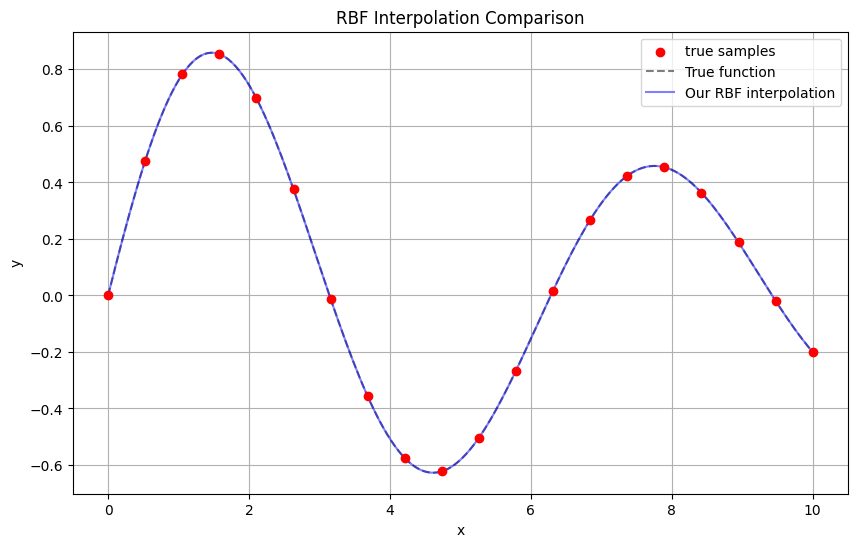

Our RBF MSE: 0.000000


In [3]:
# Example: we get a sample of a test function, 
# and then we ask the RBF interpolator to pass through the given data points 

# The test function
def test_func(x):
    return np.sin(x) * np.exp(-x/10)

# The main function to implement the example
def main():
    # Create synthetic data
    x = np.linspace(0, 10, 20)
    y_true = test_func(x)  # Underlying function
    
    # Create test points (more dense than training points)
    x_test = np.linspace(0, 10, 200)
    y_test_true = test_func(x_test)  # True function at test points
    
    # Fit our RBF interpolator
    rbf_our = RBFInterpolator(kernel='gaussian')
    rbf_our.fit(x.reshape(-1, 1), y_true)
    y_pred_our = rbf_our.predict(x_test.reshape(-1, 1))
       
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y_true, c='red', label='true samples', zorder=3)
    plt.plot(x_test, y_test_true, 'k--', label='True function', alpha=0.5)  # Fixed: using y_test_true
    plt.plot(x_test, y_pred_our, 'b-', label='Our RBF interpolation',alpha=.5)
    plt.legend()
    plt.title('RBF Interpolation Comparison')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()
    
    # Calculate MSE against the true function
    mse_our = np.mean((y_pred_our - y_test_true)**2)
    print(f"Our RBF MSE: {mse_our:.6f}")

if __name__ == "__main__":
    main()